In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import random
import math

In [8]:
hotelstotal = pd.read_csv('../../training_set_VU_DM.csv')

In [9]:
hotels = hotelstotal[1:20000]

In [108]:
print(hotels)

       srch_id            date_time  site_id  visitor_location_country_id  \
1            1  2013-04-04 08:32:15       12                          187   
2            1  2013-04-04 08:32:15       12                          187   
3            1  2013-04-04 08:32:15       12                          187   
4            1  2013-04-04 08:32:15       12                          187   
5            1  2013-04-04 08:32:15       12                          187   
6            1  2013-04-04 08:32:15       12                          187   
7            1  2013-04-04 08:32:15       12                          187   
8            1  2013-04-04 08:32:15       12                          187   
9            1  2013-04-04 08:32:15       12                          187   
10           1  2013-04-04 08:32:15       12                          187   
11           1  2013-04-04 08:32:15       12                          187   
12           1  2013-04-04 08:32:15       12                          187   

In [19]:
print("Length dataset:", len(hotels))

Length dataset: 4958347


In [7]:
hotelstotal.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [28]:
print(hotelstotal['comp1_inv'].describe())
# hotelstotal['prop_log_historical_price'].isnull().values.any()
print(hotelstotal['orig_destination_distance'].nunique())

count    129559.000000
mean          0.031059
std           0.229688
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: comp1_inv, dtype: float64
530595


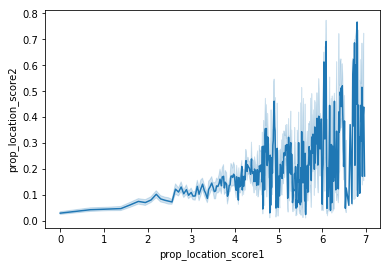

In [61]:
sns.lineplot(x = "prop_location_score1", y = "prop_location_score2", data = hotels)

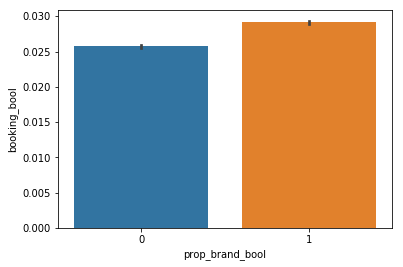

In [58]:
sns.barplot(x = "prop_brand_bool", y = "booking_bool", data = hotelstotal)

In [11]:
sns.countplot(x = "orig_destination_distance", data = hotelstotal)

KeyboardInterrupt: 

In [21]:
hotels.srch_booking_window.describe()

count    19999.000000
mean        37.398370
std         54.548643
min          0.000000
25%          0.000000
50%         20.000000
75%         50.000000
max        360.000000
Name: srch_booking_window, dtype: float64

In [63]:
pd.options.mode.chained_assignment = None  # default='warn'

hotels = hotelstotal

def categorize_hist_starrating(df):
    
    df['visitor_hist_starrating'] = df['visitor_hist_starrating'].fillna(-0.5)
    
    bins = [-1, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df['vis_star'] = pd.cut(df.visitor_hist_starrating, bins, labels = labels)
    
    return df.drop(['visitor_hist_starrating'], axis=1)
    
def categorize_hist_usd(df):
    df['vis_usd'] = pd.qcut(df['visitor_hist_adr_usd'], 4, labels = [1, 2, 3, 4])
    
    df['vis_usd'] = df['vis_usd'].cat.add_categories([0])
    df['vis_usd'] = df['vis_usd'].fillna(0)
    
    return df.drop(['visitor_hist_adr_usd'], axis=1)
    
def categorize_prop_loc_score(df):
    
    df['prop_location_score1'] = df['prop_location_score1'].round()
    df['prop_location_score2'] = df['prop_location_score2'].fillna(df['prop_location_score2'].mean())
    df['prop_location_score2'] = df['prop_location_score2'].round(1)
    
    return df
    
def categorize_historical_price(df):
    
    df['prop_hist_price'] = pd.qcut(df['prop_log_historical_price'], 6, duplicates = 'drop', labels = [0, 1, 2, 3, 4, 5])
    
    return df.drop(['prop_log_historical_price'], axis=1)
    
def categorize_price_usd(df):
    
    df['cat_price_usd'] = pd.qcut(df['price_usd'], 6, labels = [0, 1, 2, 3, 4, 5])
    
    return df.drop(['price_usd'], axis=1)
    
def categorize_nights(df):
    
    df['srch_length_of_stay'] = np.where(df['srch_length_of_stay'] > 4, 5, df['srch_length_of_stay'])
    return df
    
def categorize_booking_window(df):
    
    df['srch_booking_window'] = df['srch_booking_window']/7
    df['srch_booking_window'] = df['srch_booking_window'].round(0).astype(int)
    df['srch_booking_window'] = np.where(df['srch_booking_window'] > 12, 12, df['srch_booking_window'])
    return df
    
def categorize_srch_count(df):
    
    df['srch_adults_count'] = np.where(df['srch_adults_count'] > 3, 3, df['srch_adults_count'])
    df['srch_children_count'] = np.where(df['srch_children_count'] > 3, 3, df['srch_children_count'])
    df['srch_room_count'] = np.where(df['srch_room_count'] > 2, 2, df['srch_room_count'])
    return df
    
def categorize_log_probs(df):
    
    df['srch_query_affinity_score'] = pd.qcut(df['srch_query_affinity_score'], 4, duplicates = 'drop')
    df['srch_query_affinity_score'] = df['srch_query_affinity_score'].cat.add_categories([0])
    df['srch_query_affinity_score'] = df['srch_query_affinity_score'].fillna(0)
    return df
    
def categorize_distance_hotel(df):
    
    distgroup = df.groupby(["visitor_location_country_id", "prop_country_id"])
    
    df['orig_destination_distance'] = distgroup.orig_destination_distance.apply(lambda x: x.fillna(x.mean()))
    
#     df['orig_destination_distance'] = df['orig_destination_distance'].fillna()
    
    df['orig_destination_distance'] = pd.qcut(df['orig_destination_distance'], 6, labels = [1, 2, 3, 4, 5, 6])
    df['orig_destination_distance'] = df['orig_destination_distance'].cat.add_categories([0])
    df['orig_destination_distance'] = df['orig_destination_distance'].fillna(0)
    return df
    
def categorize_comp_rates(df):
    
    
    df['all_comp_rates'] = df[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate','comp8_rate']].min(axis=1)
    df['all_comp_rates'] = df['all_comp_rates'].fillna(2)
    
    df.update(df[['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate']].fillna(0))
    
    df['count_comp_rates'] = df['comp1_rate'] + df['comp2_rate'] + df['comp3_rate'] + df['comp4_rate'] + df['comp5_rate'] + df['comp6_rate'] + df['comp7_rate'] + df['comp8_rate']
    df = df.drop(['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate'], axis=1)
    return df
    
def categorize_comp_inv(df):
    
    df.update(df[['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv']].fillna(0))
    
    df['count_comp_inv'] = df['comp1_inv'] + df['comp2_inv'] + df['comp3_inv'] + df['comp4_inv'] + df['comp5_inv'] + df['comp6_inv'] + df['comp7_inv'] + df['comp8_inv']
    df = df.drop([['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv']], axis=1)
    return df
    
def categorize_comp_perc(df):
    
    df['comps_perc_diff'] = df[['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff']].mean(axis=1)
    df['comps_perc_diff'] = pd.qcut(df['comps_perc_diff'], 4, labels = [1, 2, 3, 4])
    df['comps_perc_diff'] = df['comps_perc_diff'].cat.add_categories([0])
    df['comps_perc_diff'] = df['comps_perc_diff'].fillna(0)
    df = df.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff'], axis=1)
    return df
    
hotels = categorize_hist_starrating(hotels)
hotels = categorize_hist_usd(hotels)
hotels = categorize_prop_loc_score(hotels)
hotels = categorize_historical_price(hotels)
hotels = categorize_price_usd(hotels)
hotels = categorize_nights(hotels)
hotels = categorize_booking_window(hotels)
hotels = categorize_srch_count(hotels)
hotels = categorize_log_probs(hotels)
hotels = categorize_distance_hotel(hotels)
hotels = categorize_comp_rates(hotels)
hotels = categorize_comp_inv(hotels)
hotels = categorize_comp_perc(hotels)

TypeError: Categorical cannot perform the operation mean

In [57]:
hotels

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,gross_bookings_usd,booking_bool,vis_star,vis_usd,prop_hist_price,cat_price_usd,all_comp_rates,count_comp_rates,count_comp_inv,comps_perc_diff
0,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,893,3,3.5,...,NaN,0,0,0,3,2,0.0,0.0,0.0,0
1,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,10404,4,4.0,...,NaN,0,0,0,3,4,0.0,0.0,1.0,0
2,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,21315,3,4.5,...,NaN,0,0,0,3,4,0.0,0.0,0.0,0
3,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,27348,2,4.0,...,NaN,0,0,0,1,5,-1.0,-3.0,1.0,1
4,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,29604,4,3.5,...,NaN,0,0,0,3,3,0.0,0.0,0.0,0
5,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,30184,4,4.5,...,NaN,0,0,0,4,4,0.0,0.0,0.0,1
6,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,44147,3,3.5,...,NaN,0,0,0,2,3,0.0,0.0,0.0,0
7,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,50984,2,0.0,...,NaN,0,0,0,1,1,2.0,0.0,0.0,0
8,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,53341,4,4.0,...,NaN,0,0,0,4,3,0.0,0.0,0.0,1
9,1,2013-04-04 08:32:15,12,187,-0.5,NaN,219,56880,4,4.0,...,NaN,0,0,0,3,5,0.0,0.0,0.0,0


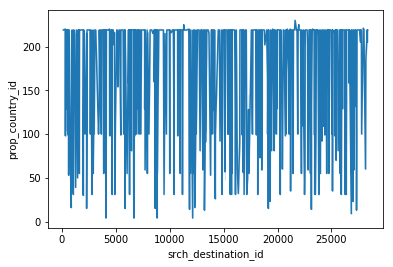

In [142]:
# sns.countplot(x = "position", data = hotels)
sns.lineplot(x = "srch_destination_id", y = "prop_country_id", data = hotels)